In [19]:
import pandas as pd
df = pd.read_csv('final_output.csv')

In [25]:
df.head()

,Title,Article Link,Date,Day,Month,Year,Article,Location,TokenCount,Summary,Tags,Sentiment
0,63 false RTE admissions to be cancelled from G...,https://english.gujaratsamachar.com/news/gujar...,2024-10-19,19,10,2024,In a false admission case under the Right to E...,ahmedabad,246,In a false admission case under the Right to E...,Education,Negative
1,Vadaj tensions: Housing society terrorised ami...,https://english.gujaratsamachar.com/news/gujar...,2024-10-19,19,10,2024,Just days after unrest in Ahmedabad’s Amraiwad...,ahmedabad,446,Just days after unrest in Ahmedabad’s Amraiwad...,Crime,Negative
2,Breast cancer awareness month: Over 54k diagno...,https://english.gujaratsamachar.com/news/gujar...,2024-10-19,19,10,2024,October is recognised as ‘Breast Cancer Awaren...,ahmedabad,484,October is recognised as ‘Breast Cancer Awaren...,Health,Positive
3,"Vitamin capsules filled with starch, sold on A...",https://english.gujaratsamachar.com/news/gujar...,2024-10-19,19,10,2024,Representative image Ahmedabad Crime Branch un...,ahmedabad,154,Representative image Ahmedabad Crime Branch (F...,Crime,Negative
4,Ahmedabad CP makes helmets mandatory for staff,https://english.gujaratsamachar.com/news/gujar...,2024-10-19,19,10,2024,‘Practising before preaching’ is the Ahmedabad...,ahmedabad,282,‘Practising before preaching’ is the Ahmedabad...,General,Positive


In [30]:
print(f"Article : {df['Article'][15]} \n\n Summary : {df['Summary'][15]} \n\n")

Article : Due to heavy rains in Gujarat, farmers have faced heavy losses with their crops. As a result, vegetable prices are soaring. In many districts of Gujarat, seasonal rainfall has exceeded 100%, and certain areas are still receiving rain, causing damage to the crops. The heavy rains have led to a shortage of vegetables in the market and rise in price. For example, the price of tomatoes has surged to ₹120 per kg, while onions are priced at ₹70, ginger at ₹140, and potatoes at ₹50 per kg. Before the festivities of Diwali, the surge in prices are likely to break the budget for many households. Before this, the cost of veg thali had increased by 11% in the month of July as ingredient prices went up.  However, year-on-year, the cost of a representative home-cooked veg thali declined by 4% in July. A total 7% out of the 11% rise in the cost of the veg thali can be attributed to only tomato prices, which zoomed 55% month-on-month from ₹42 per kg in June to ₹66 per kg in July, and now ha

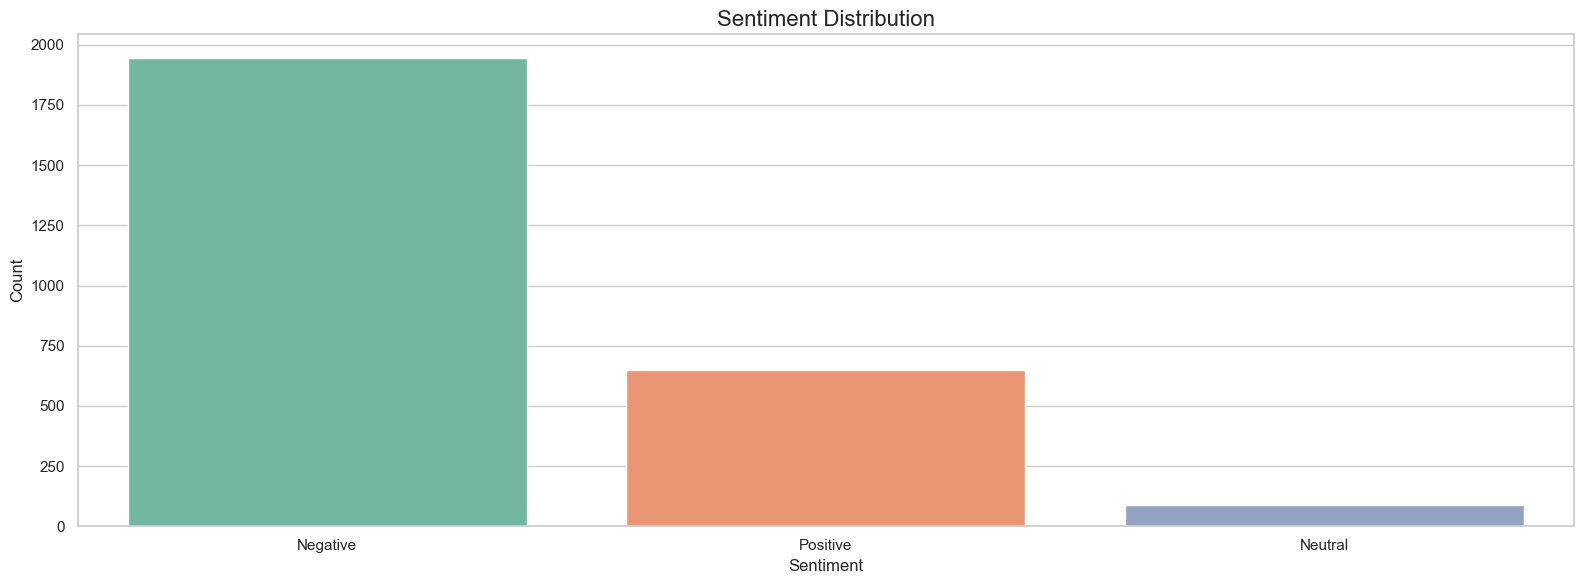

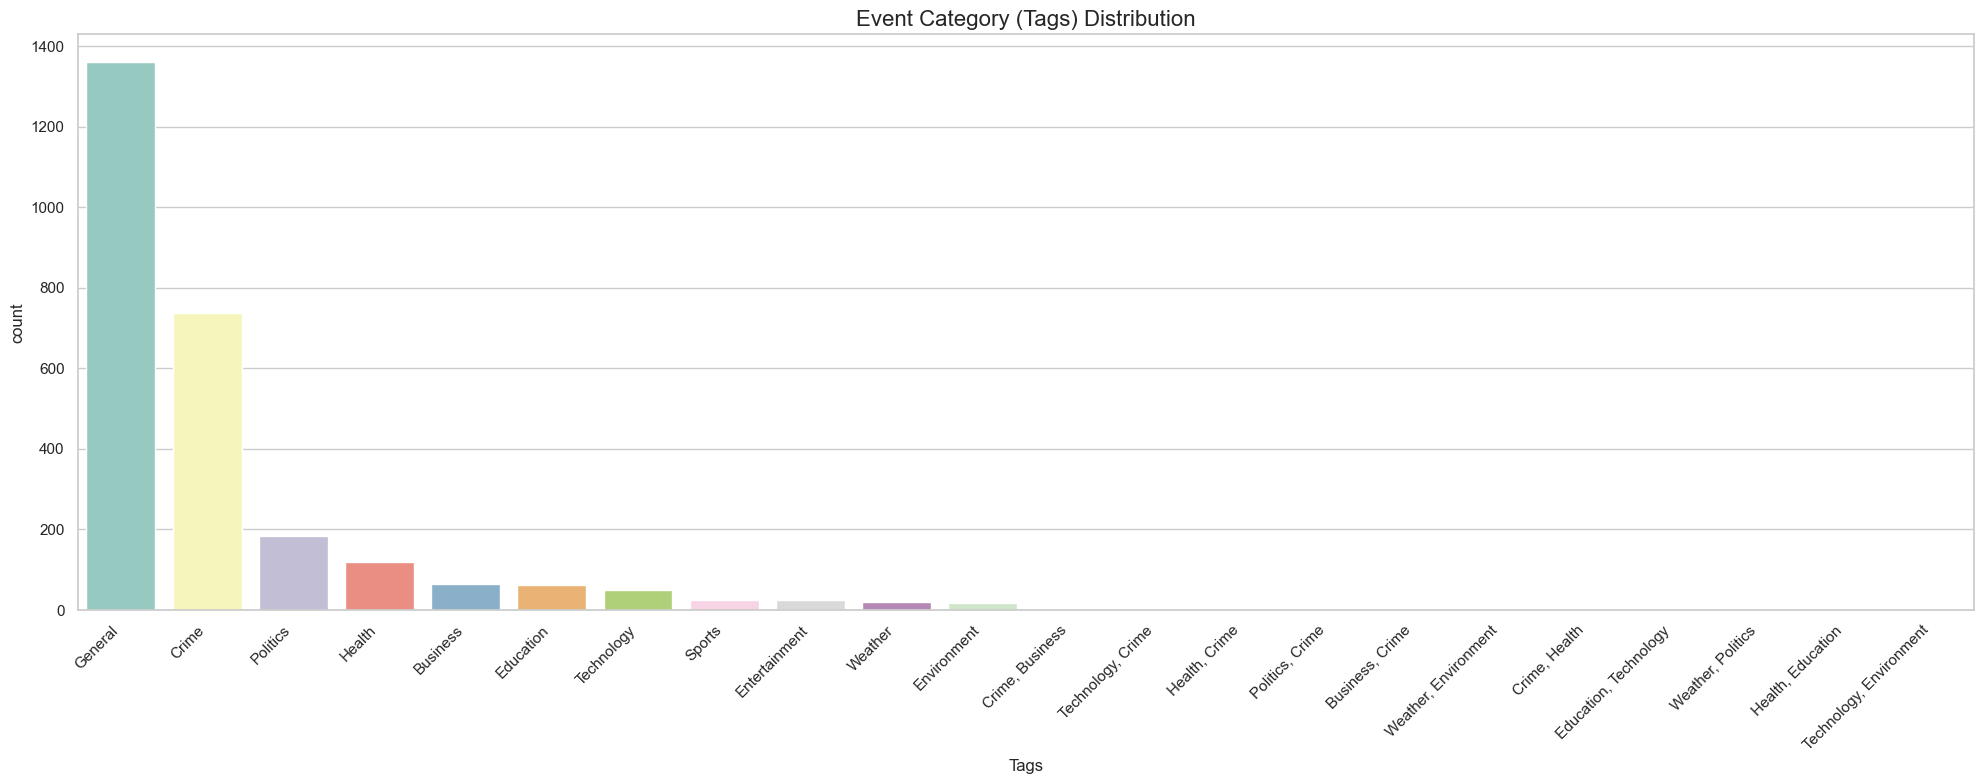

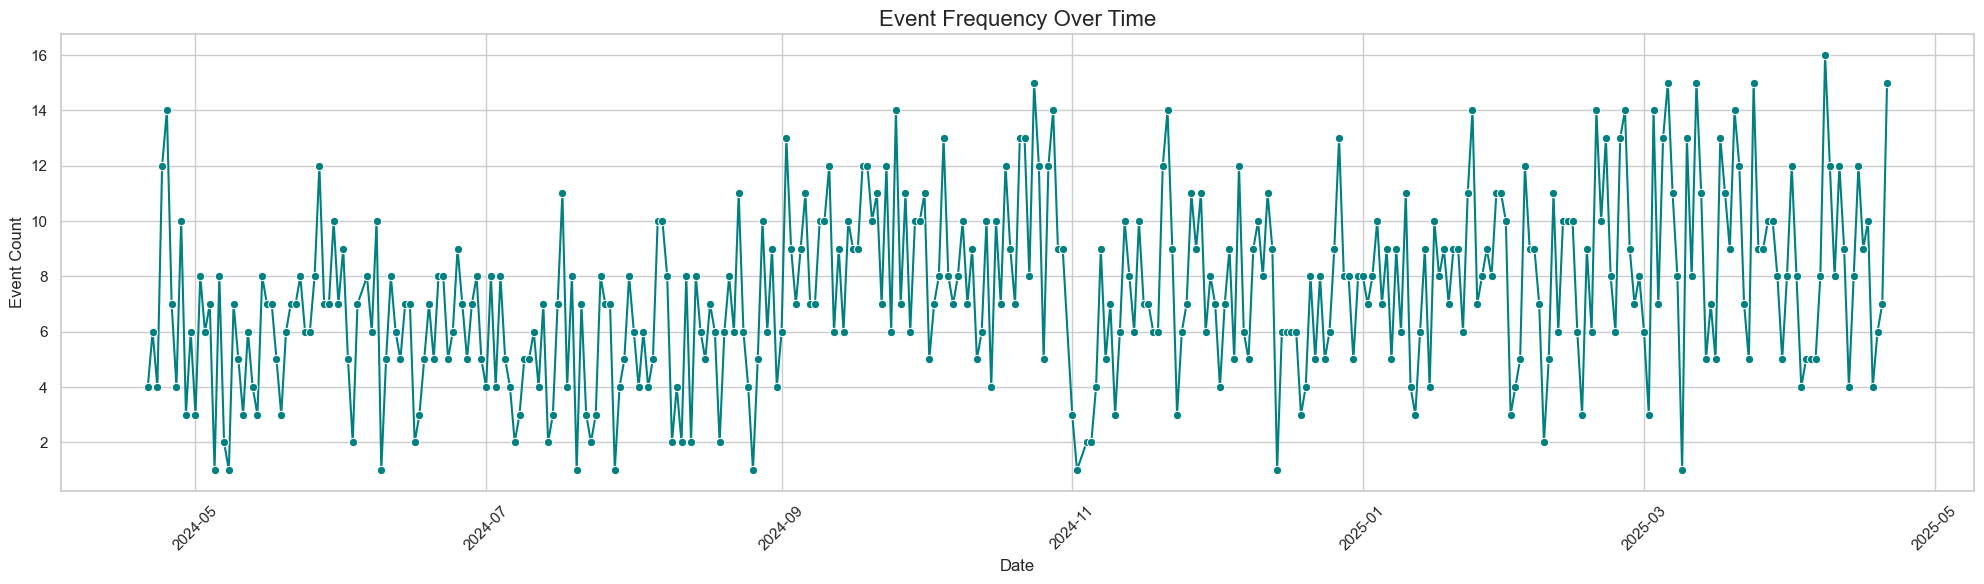

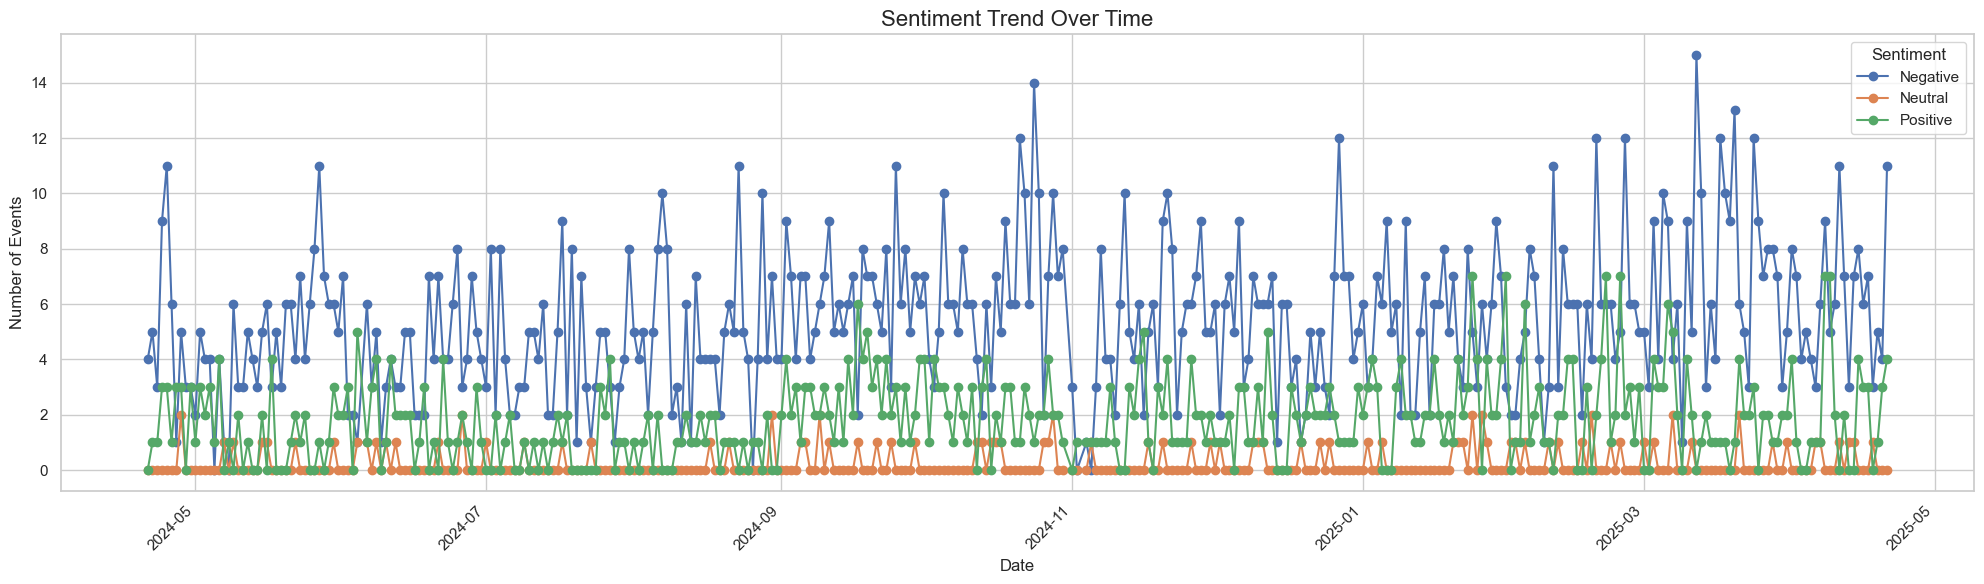

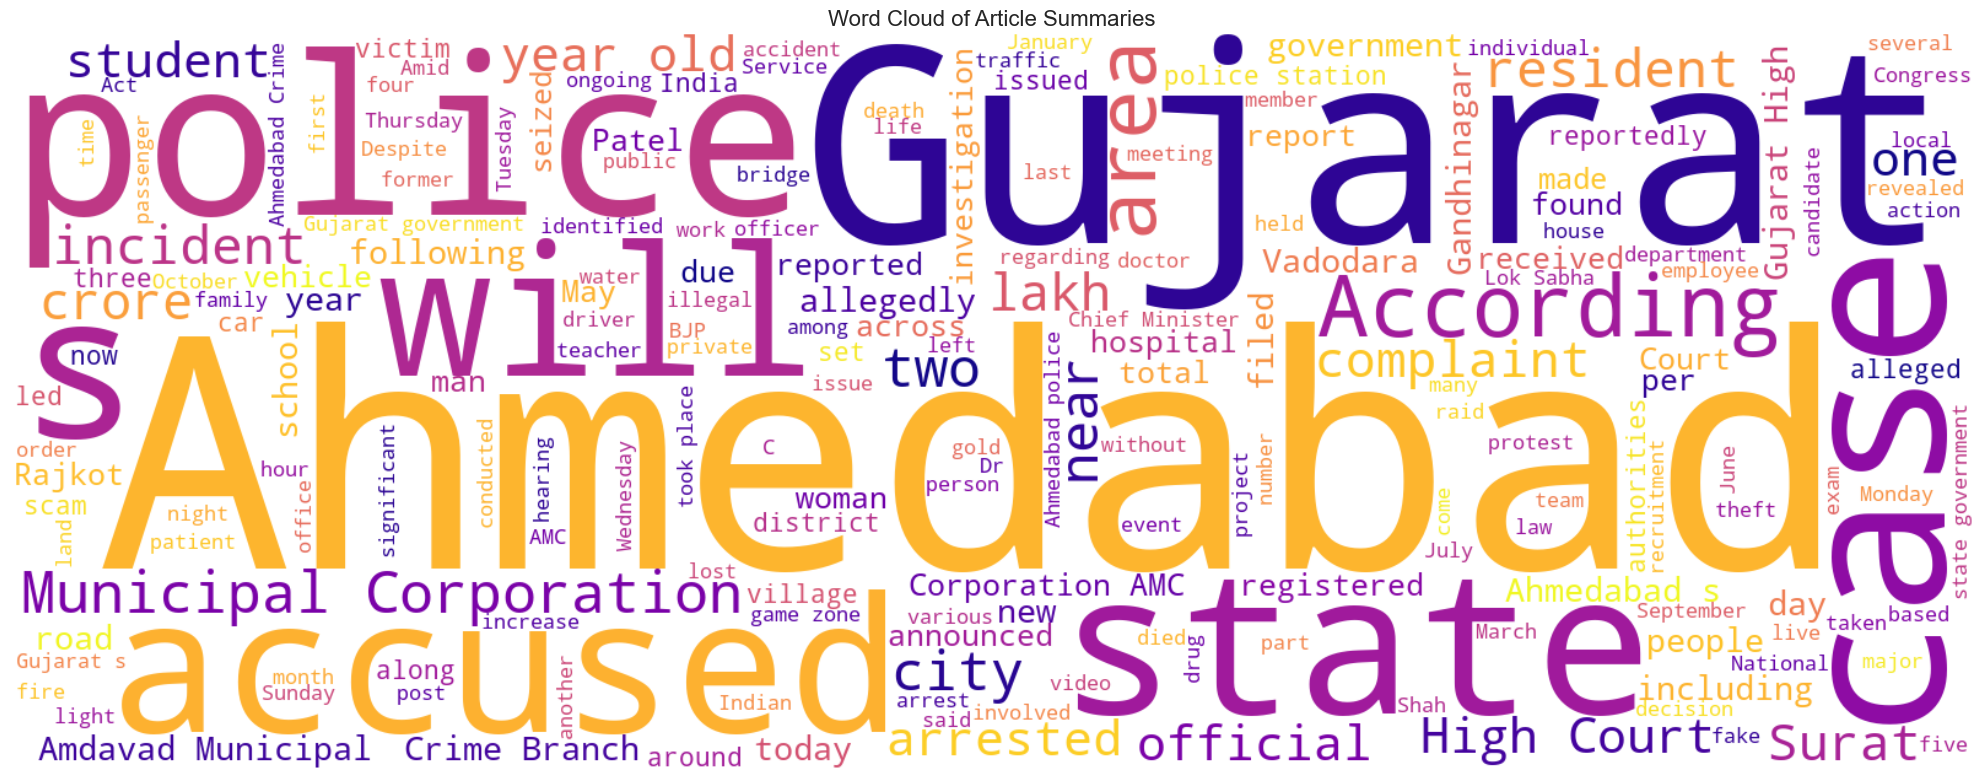

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import warnings

warnings.filterwarnings('ignore')


df = pd.read_csv("final_output.csv")


plt.figure(figsize=(16, 6))
sns.countplot(data=df, x='Sentiment', palette='Set2')
plt.title("Sentiment Distribution", fontsize=16)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.savefig("sentiment_distribution.png")
plt.show()


plt.figure(figsize=(20, 8))
sns.countplot(data=df, x='Tags', order=df['Tags'].value_counts().index, palette='Set3')
plt.title("Event Category (Tags) Distribution", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("tags_distribution.png")
plt.show()


df['Date'] = pd.to_datetime(df['Date'])
df_time = df.groupby(df['Date'].dt.date).size().reset_index(name='Event Count')

plt.figure(figsize=(20, 6))
sns.lineplot(data=df_time, x='Date', y='Event Count', marker='o', color='teal')
plt.title("Event Frequency Over Time", fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("events_over_time.png")
plt.show()


df_sent_time = df.groupby(['Date', 'Sentiment']).size().unstack().fillna(0)

df_sent_time.plot(kind='line', figsize=(20, 6), marker='o')
plt.title("Sentiment Trend Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Events", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("sentiment_trend.png")
plt.show()


text = " ".join(summary for summary in df['Summary'] if isinstance(summary, str))
wordcloud = WordCloud(width=1600, height=600, background_color="white", colormap="plasma").generate(text)

plt.figure(figsize=(20, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Article Summaries", fontsize=16)
plt.tight_layout()
plt.savefig("summary_wordcloud.png")
plt.show()


fig = px.timeline(
    df, x_start='Date', x_end='Date', y='Title', color='Sentiment',
    hover_data=['Tags'], title="Interactive Event Timeline",
    height=1000
)
fig.update_yaxes(autorange="reversed")
fig.update_layout(
    autosize=True,
    margin=dict(l=50, r=50, t=80, b=50),
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)
fig.write_html("timeline_interactive.html")


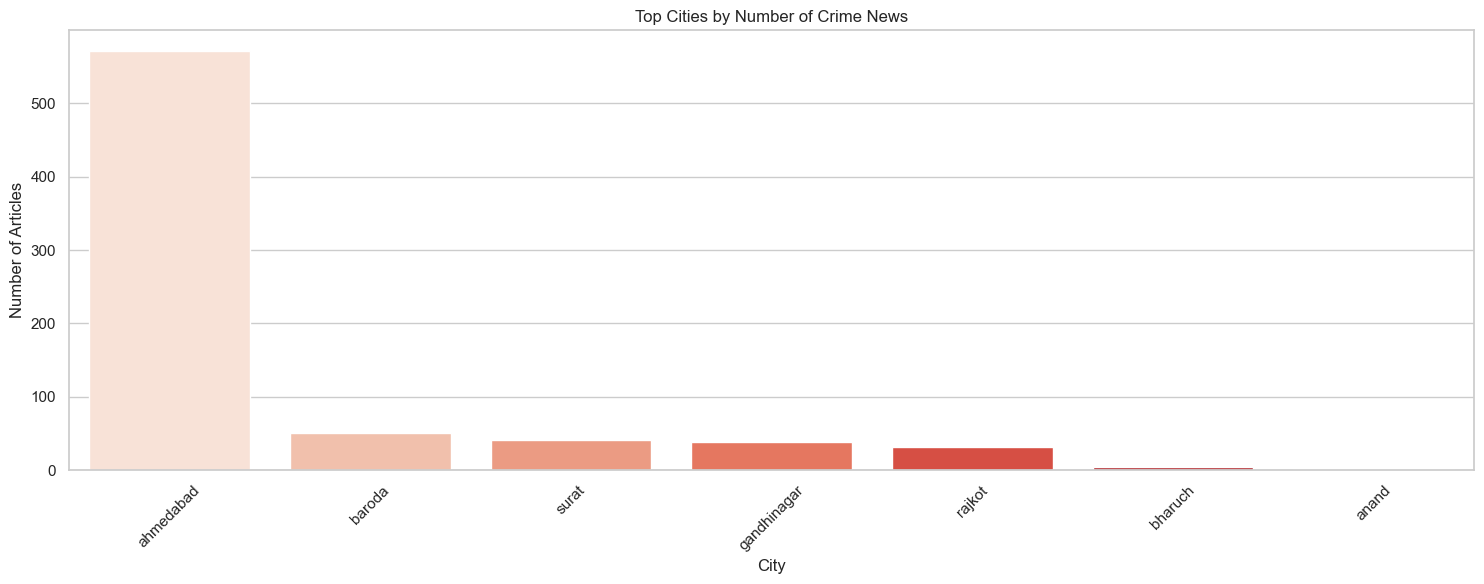

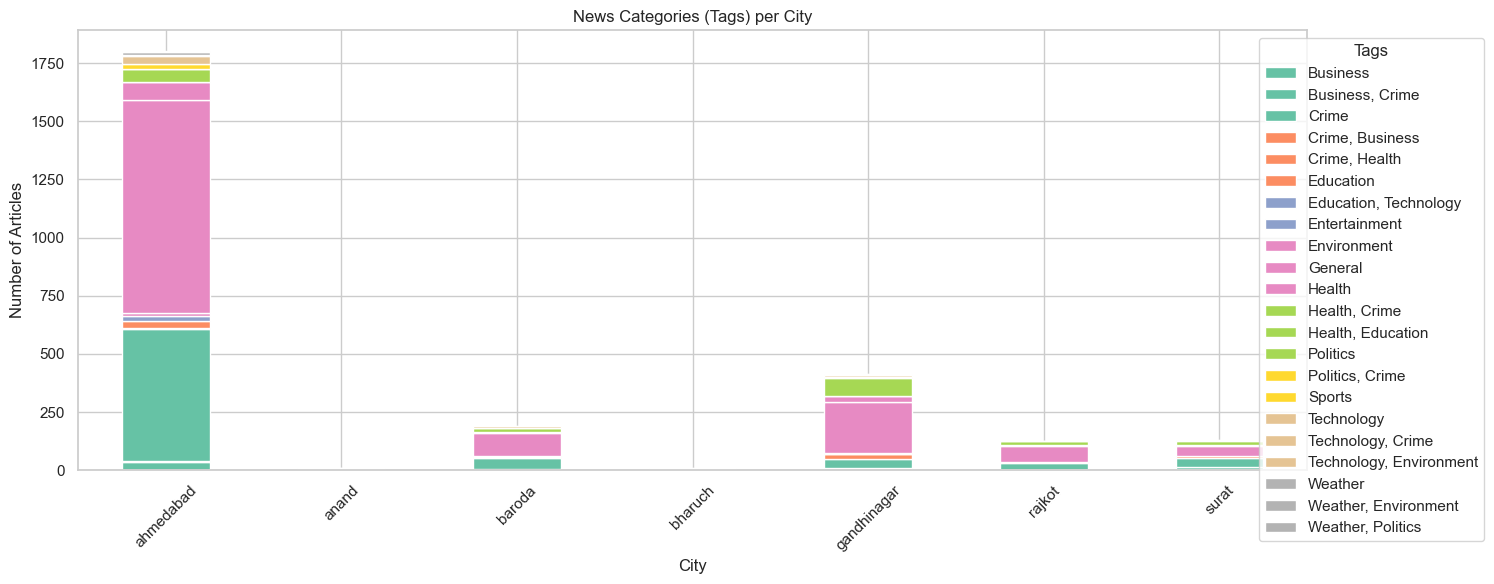

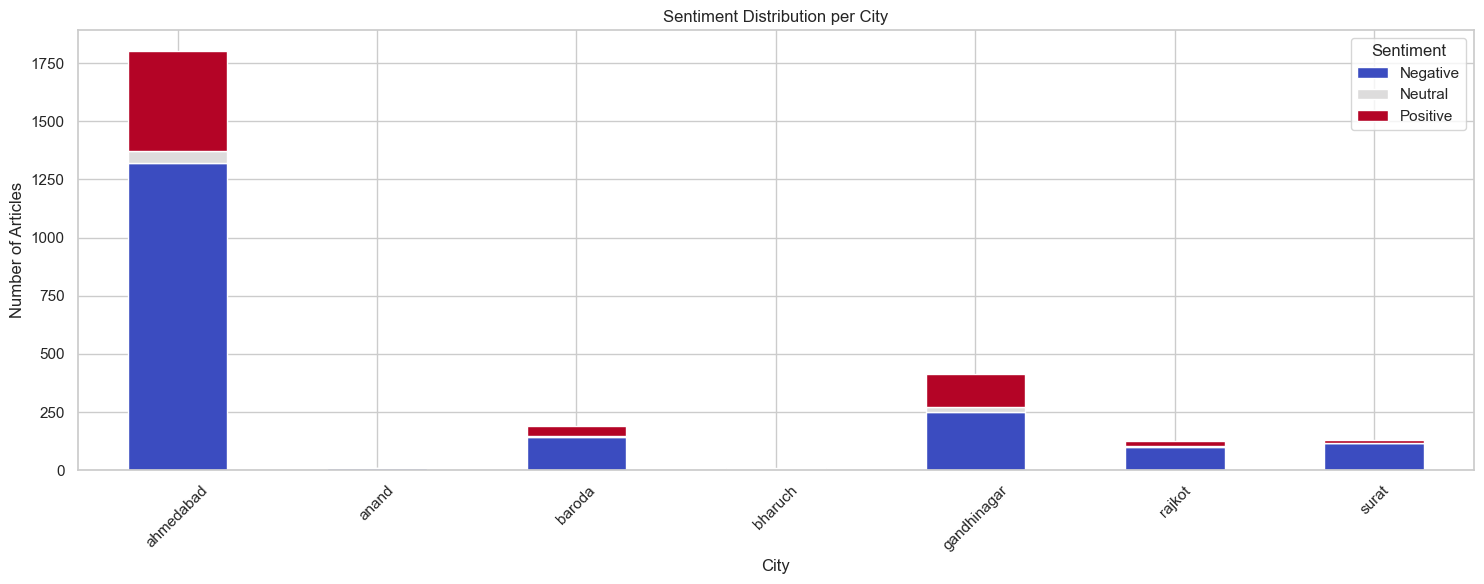

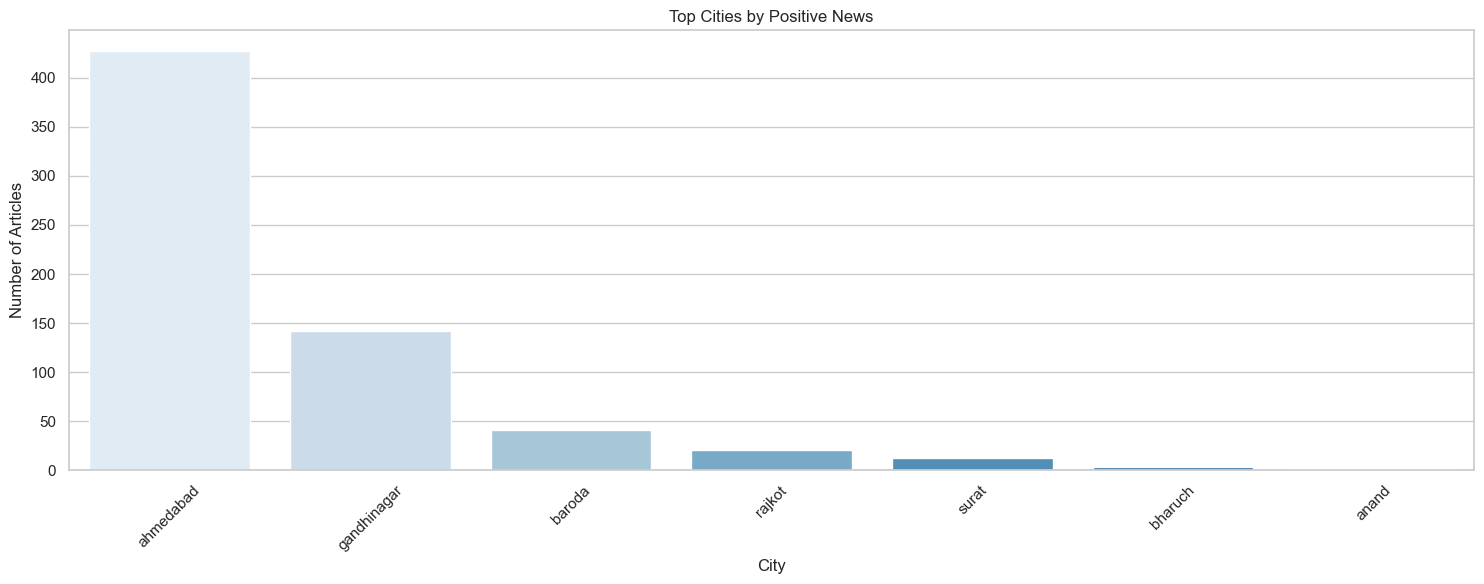

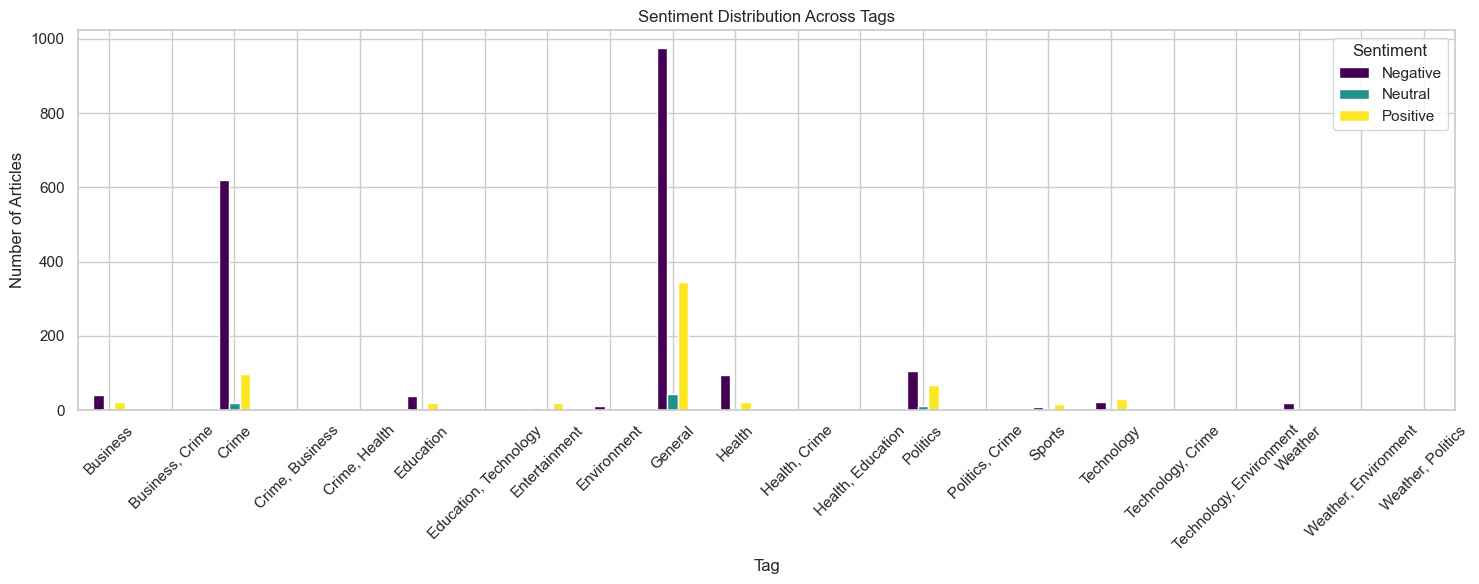

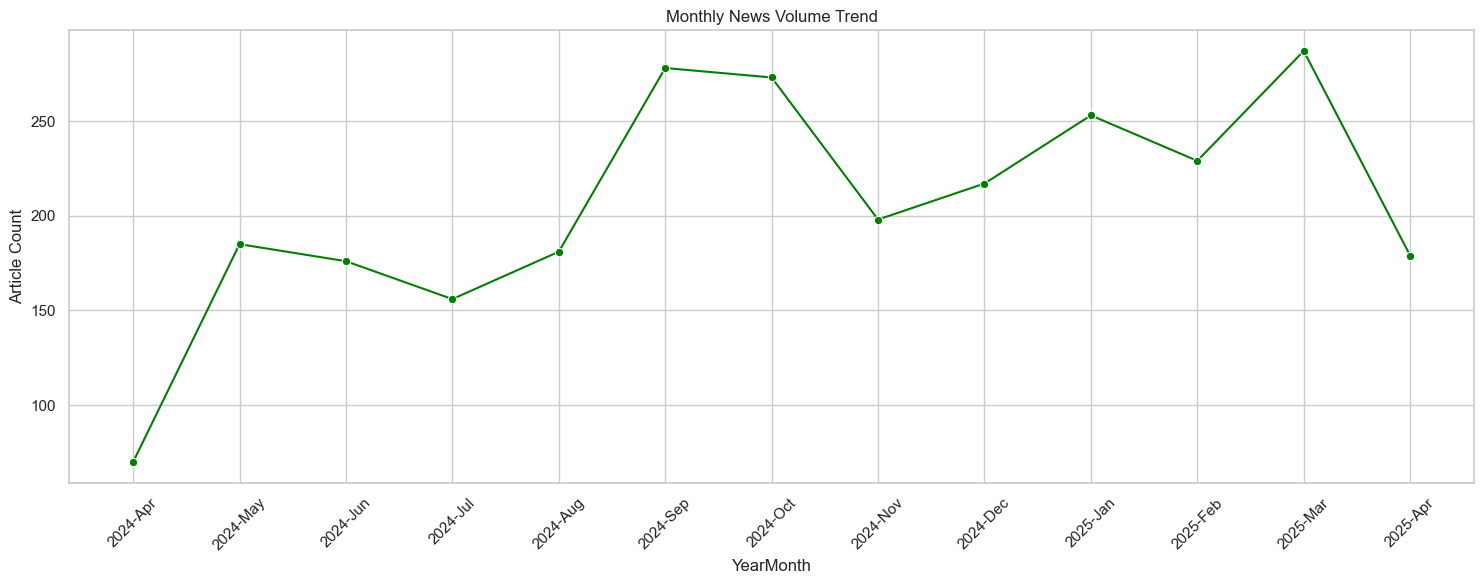

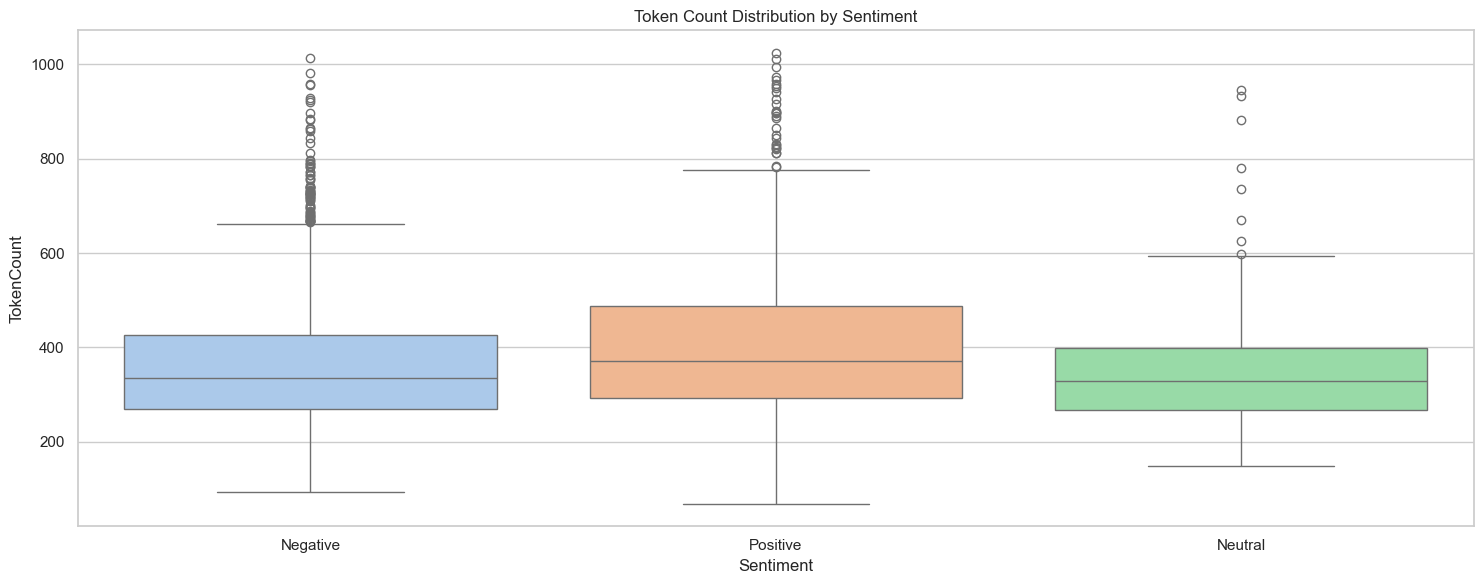

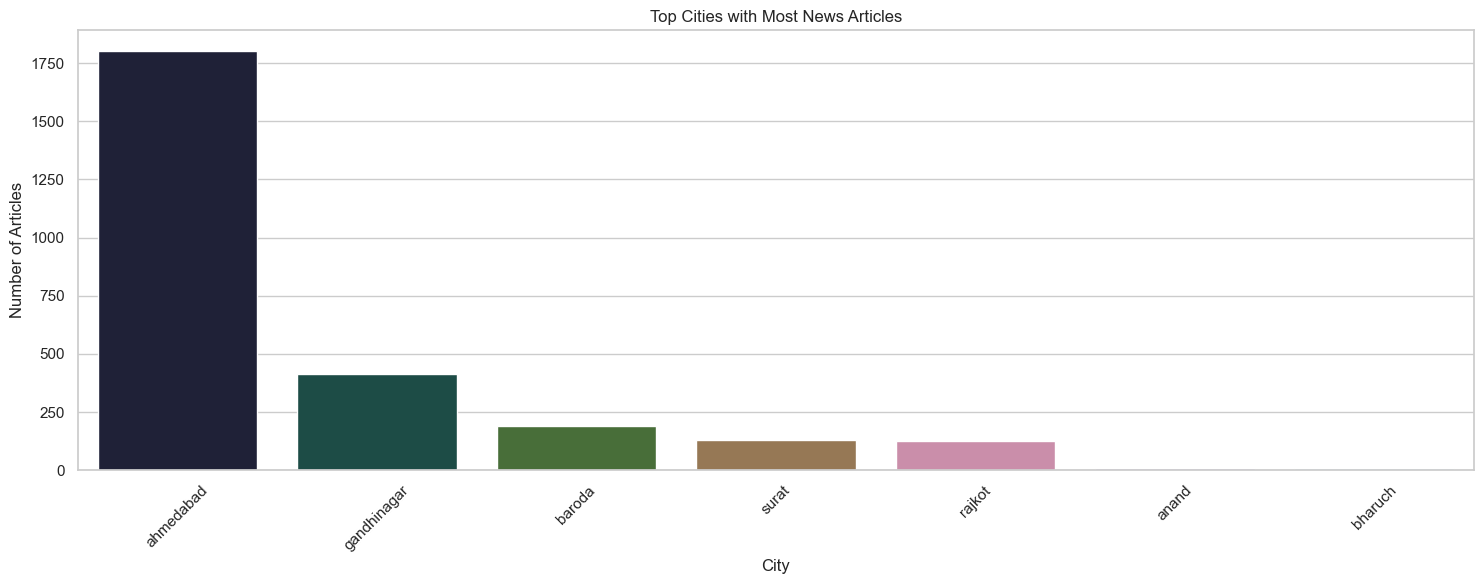

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from IPython.display import display
plt.rcParams["figure.figsize"] = (15, 6)
sns.set_theme(style="whitegrid")


df = pd.read_csv("final_output.csv")


df['Date'] = pd.to_datetime(df['Date'])


crime_cities = df[df['Tags'] == 'Crime']['Location'].value_counts().nlargest(10)
sns.barplot(x=crime_cities.index, y=crime_cities.values, palette="Reds")
plt.title("Top Cities by Number of Crime News")
plt.ylabel("Number of Articles")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


top_tags_per_city = df.groupby(['Location', 'Tags']).size().unstack().fillna(0)
ax = top_tags_per_city.plot(kind='bar', stacked=True, colormap='Set2')

plt.title("News Categories (Tags) per City")
plt.ylabel("Number of Articles")
plt.xlabel("City")
plt.xticks(rotation=45)


plt.legend(title='Tags', loc='upper right', bbox_to_anchor=(1.15, 1))

plt.tight_layout()
plt.show()



sentiment_city = df.groupby(['Location', 'Sentiment']).size().unstack().fillna(0)
sentiment_city.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title("Sentiment Distribution per City")
plt.ylabel("Number of Articles")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


top_pos = df[df['Sentiment'] == 'Positive']['Location'].value_counts().nlargest(10)
sns.barplot(x=top_pos.index, y=top_pos.values, palette="Blues")
plt.title("Top Cities by Positive News")
plt.ylabel("Number of Articles")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


sentiment_tags = df.groupby(['Tags', 'Sentiment']).size().unstack().fillna(0)
sentiment_tags.plot(kind='bar', colormap='viridis')
plt.title("Sentiment Distribution Across Tags")
plt.ylabel("Number of Articles")
plt.xlabel("Tag")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


monthly_trend = df.groupby(['Year', 'Month']).size().reset_index(name='Article Count')
monthly_trend['MonthName'] = pd.to_datetime(monthly_trend['Month'], format='%m').dt.strftime('%b')
monthly_trend['YearMonth'] = monthly_trend['Year'].astype(str) + '-' + monthly_trend['MonthName']
sns.lineplot(x='YearMonth', y='Article Count', data=monthly_trend, marker="o", color='green')
plt.title("Monthly News Volume Trend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


df['Month-Year'] = df['Date'].dt.to_period("M").astype(str)
tag_time = df.groupby(['Month-Year', 'Tags']).size().reset_index(name='Count')
fig = px.line(tag_time, x='Month-Year', y='Count', color='Tags', title="Articles per Tag Over Time")
fig.update_layout(xaxis_title="Month-Year", yaxis_title="Number of Articles")



sns.boxplot(x='Sentiment', y='TokenCount', data=df, palette="pastel")
plt.title("Token Count Distribution by Sentiment")
plt.tight_layout()
plt.show()


top_locations = df['Location'].value_counts().nlargest(10)
sns.barplot(x=top_locations.index, y=top_locations.values, palette="cubehelix")
plt.title("Top Cities with Most News Articles")
plt.ylabel("Number of Articles")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


sent_counts = df['Sentiment'].value_counts()
fig = px.pie(values=sent_counts.values, names=sent_counts.index, title="Overall Sentiment Share")



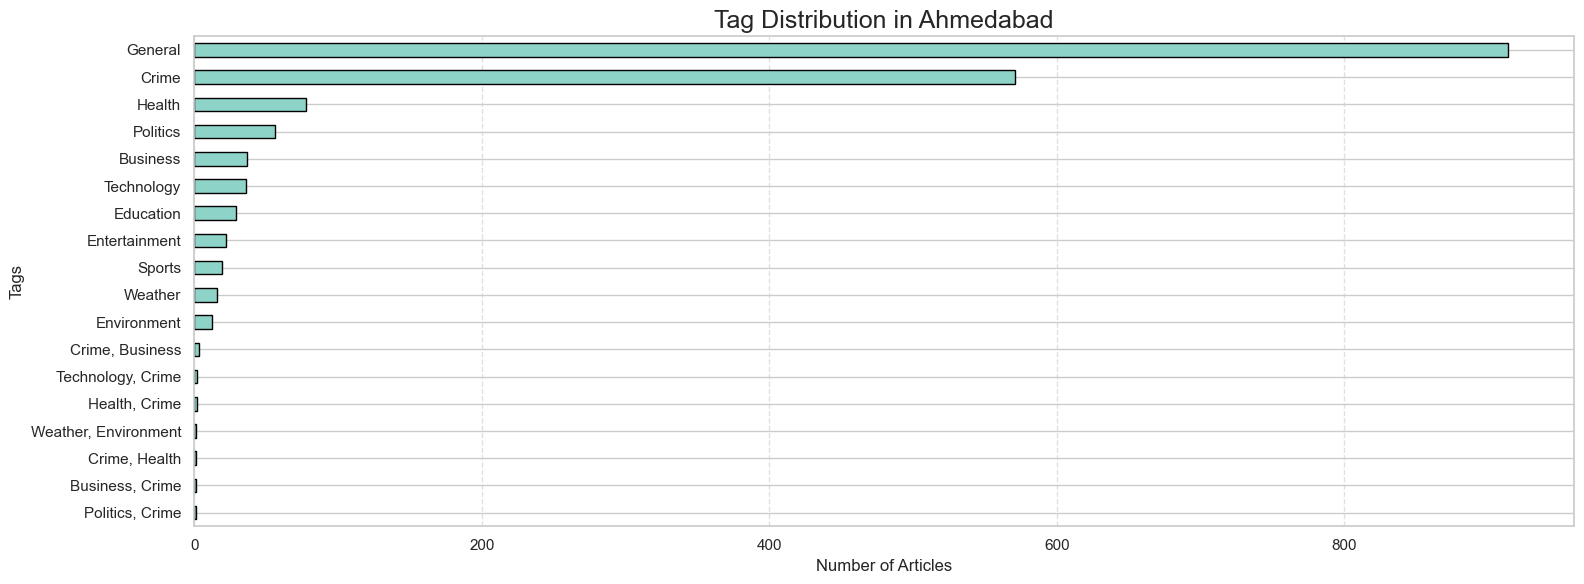

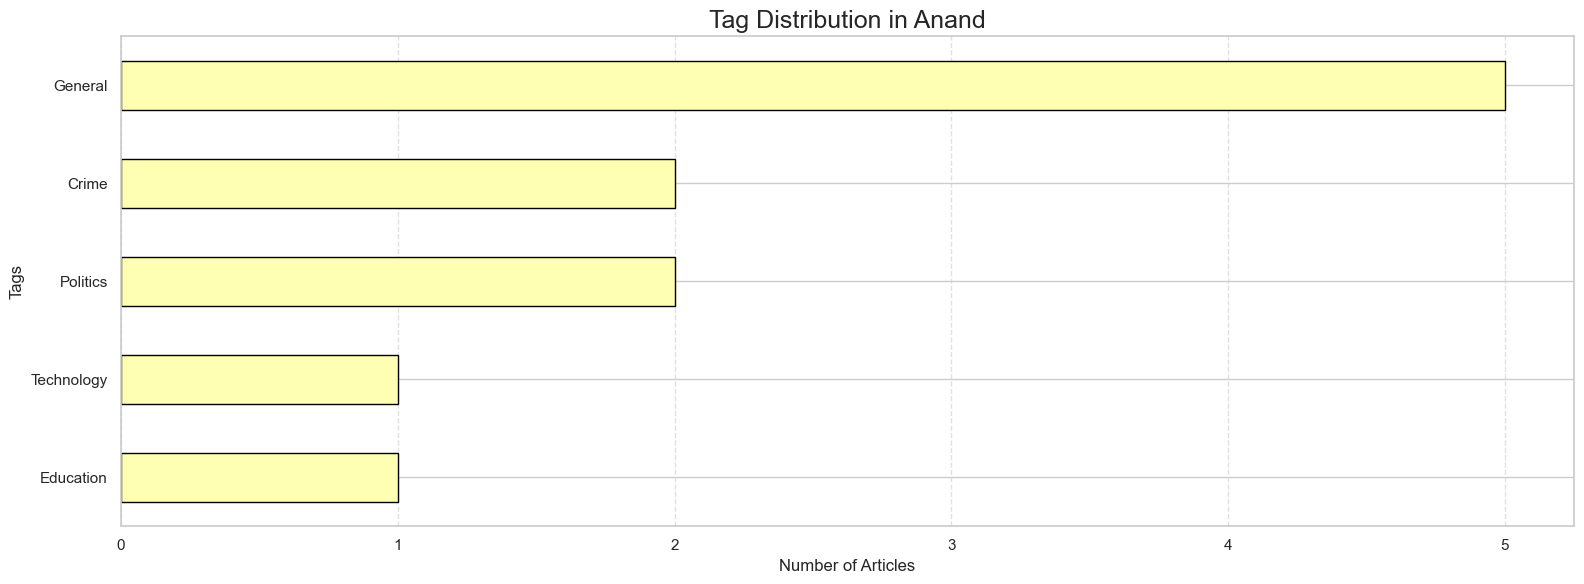

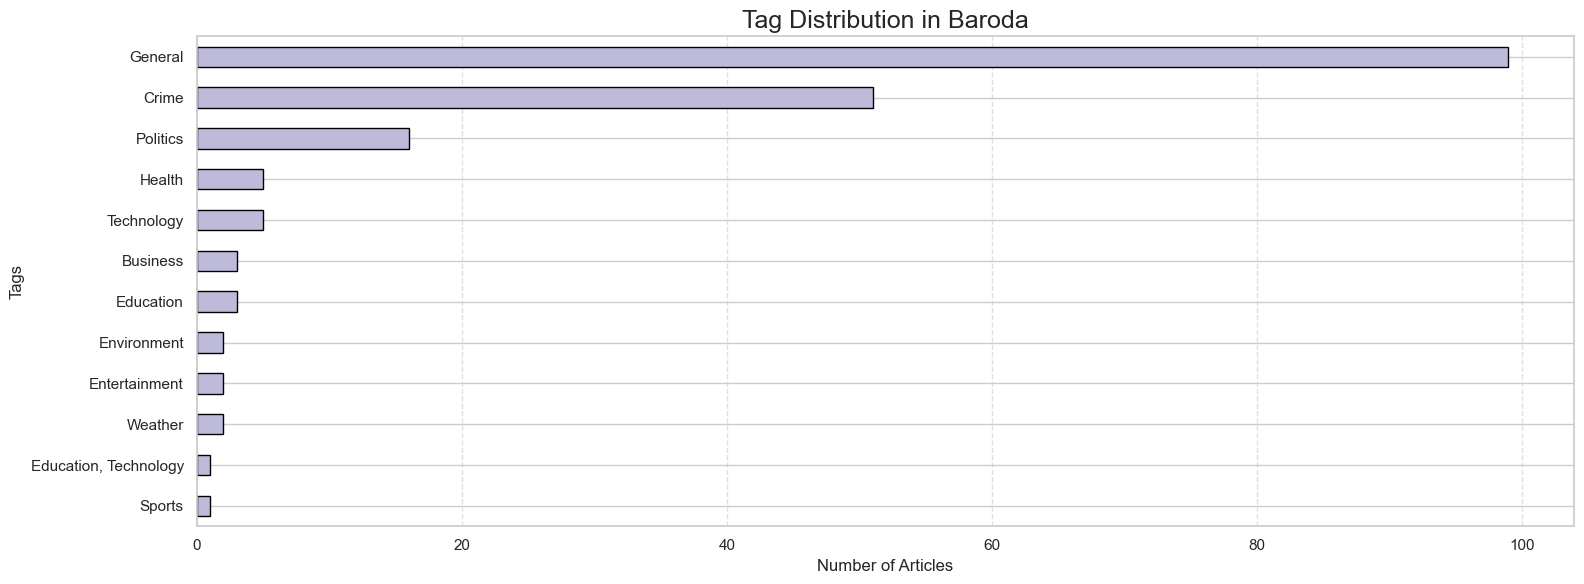

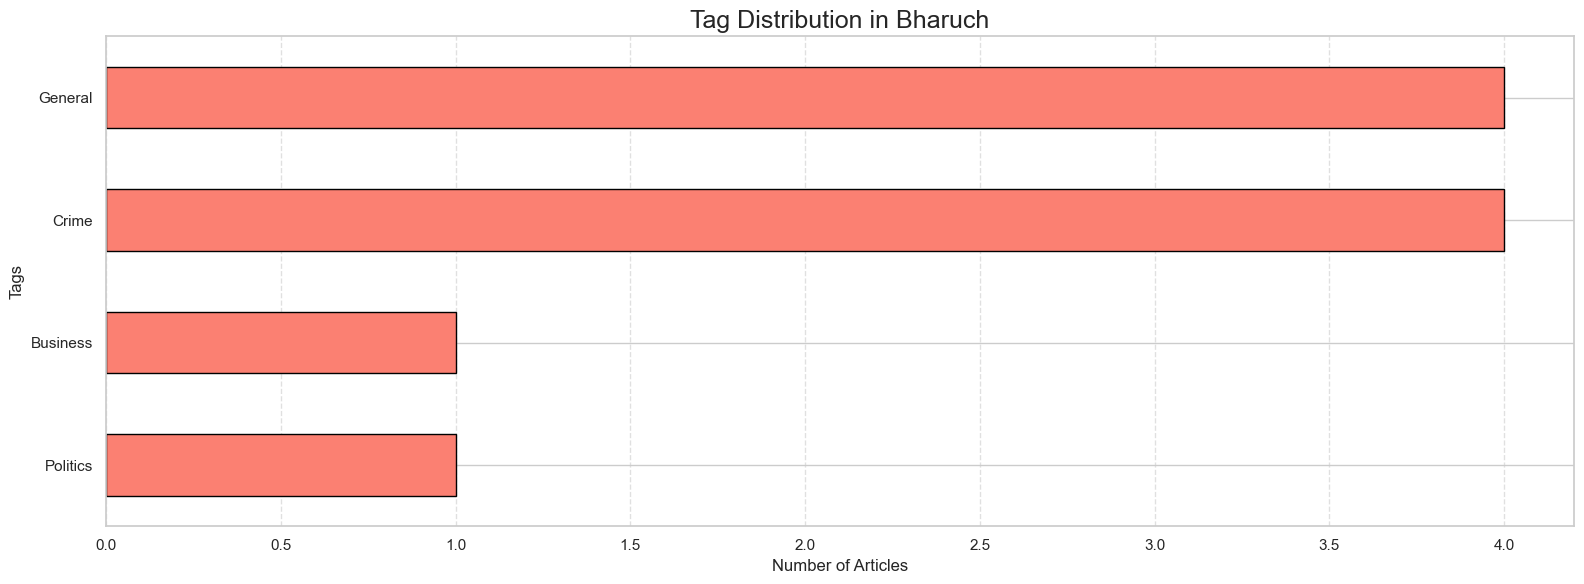

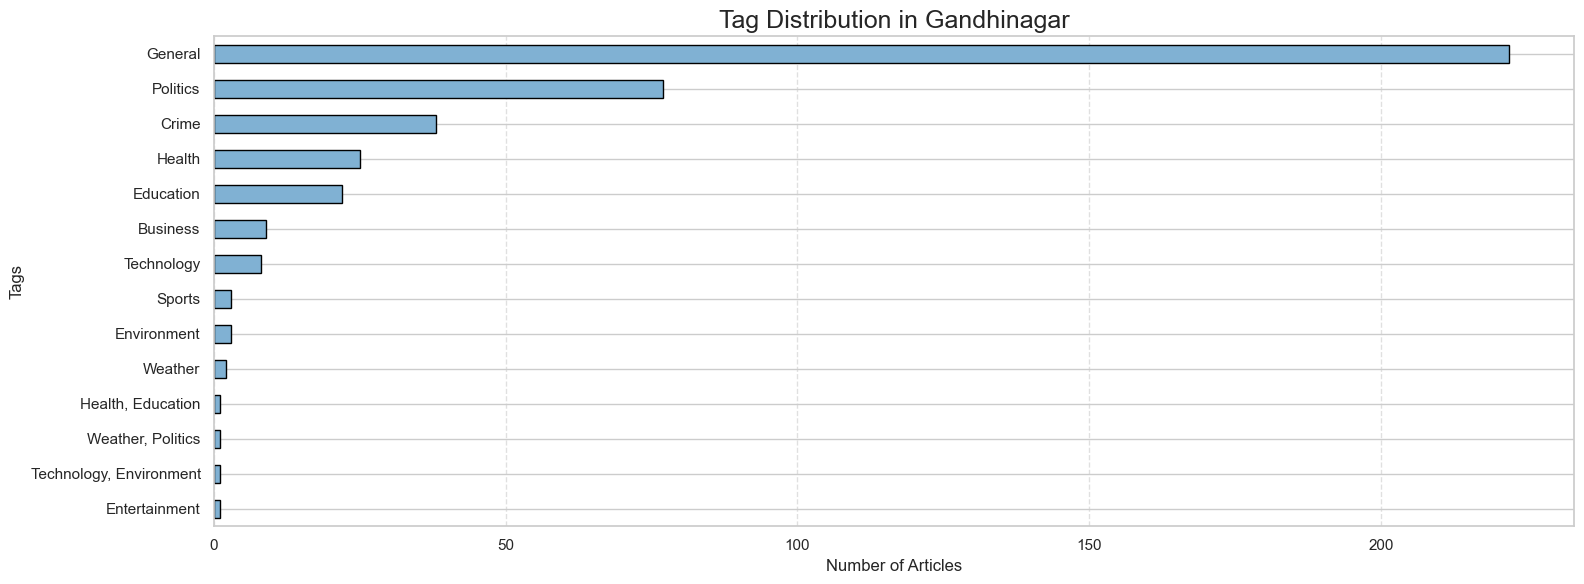

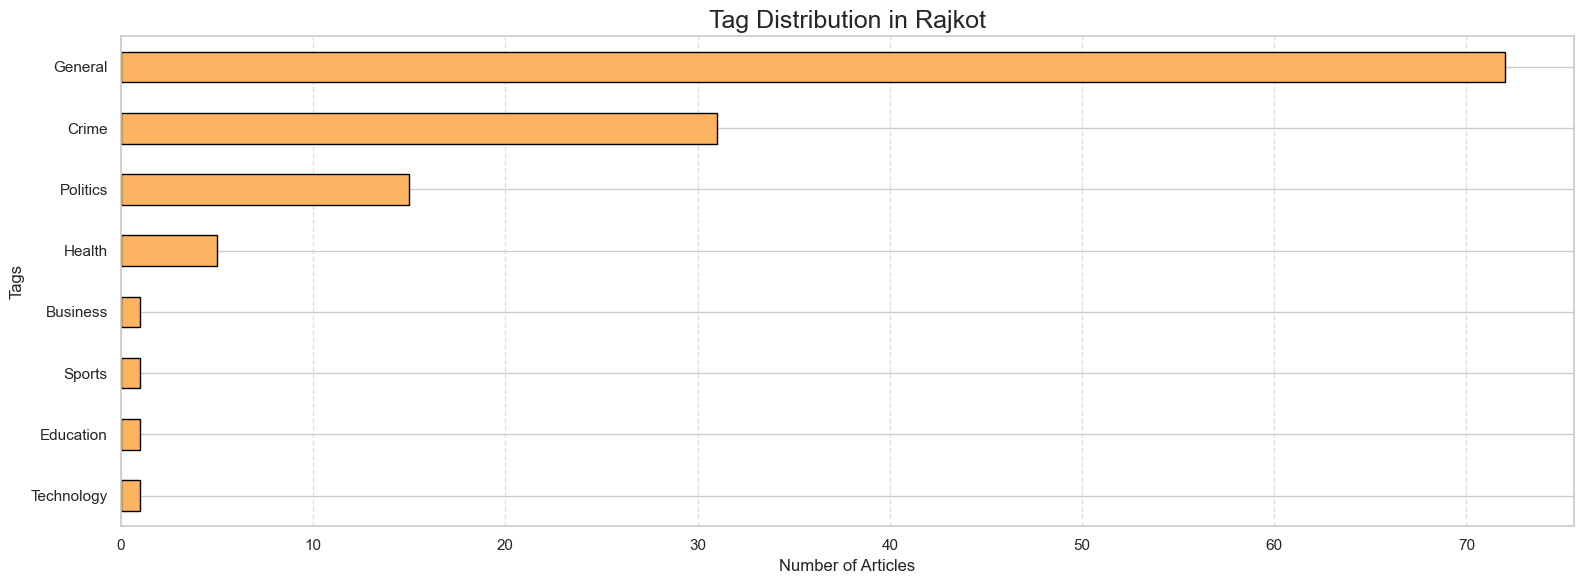

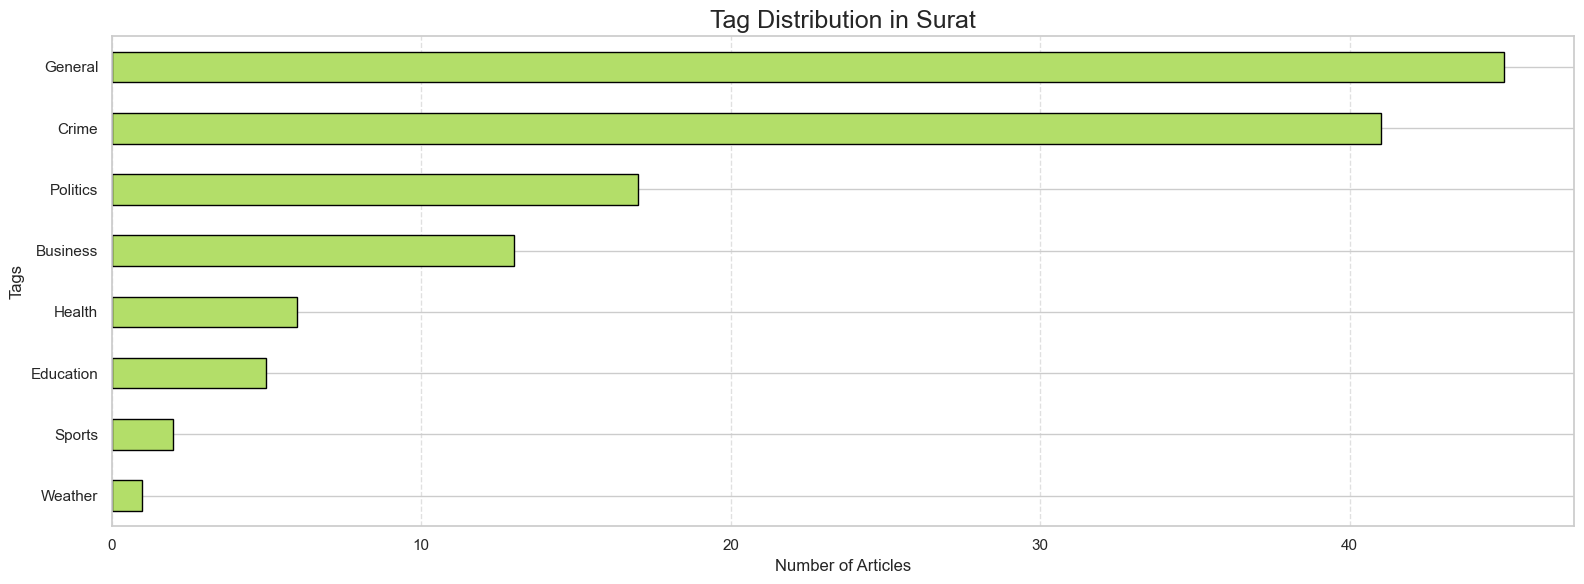

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("final_output.csv")


cities = df['Location'].dropna().unique()


palette = sns.color_palette("Set3", len(cities))


for i, city in enumerate(cities):
    city_df = df[df['Location'] == city]
    tag_counts = city_df['Tags'].value_counts()

    if len(tag_counts) < 1:
        continue

    plt.figure(figsize=(16, 6))  
    tag_counts.sort_values().plot(kind='barh', color=palette[i], edgecolor='black')
    plt.title(f"Tag Distribution in {city.title()}", fontsize=18)
    plt.xlabel("Number of Articles", fontsize=12)
    plt.ylabel("Tags", fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


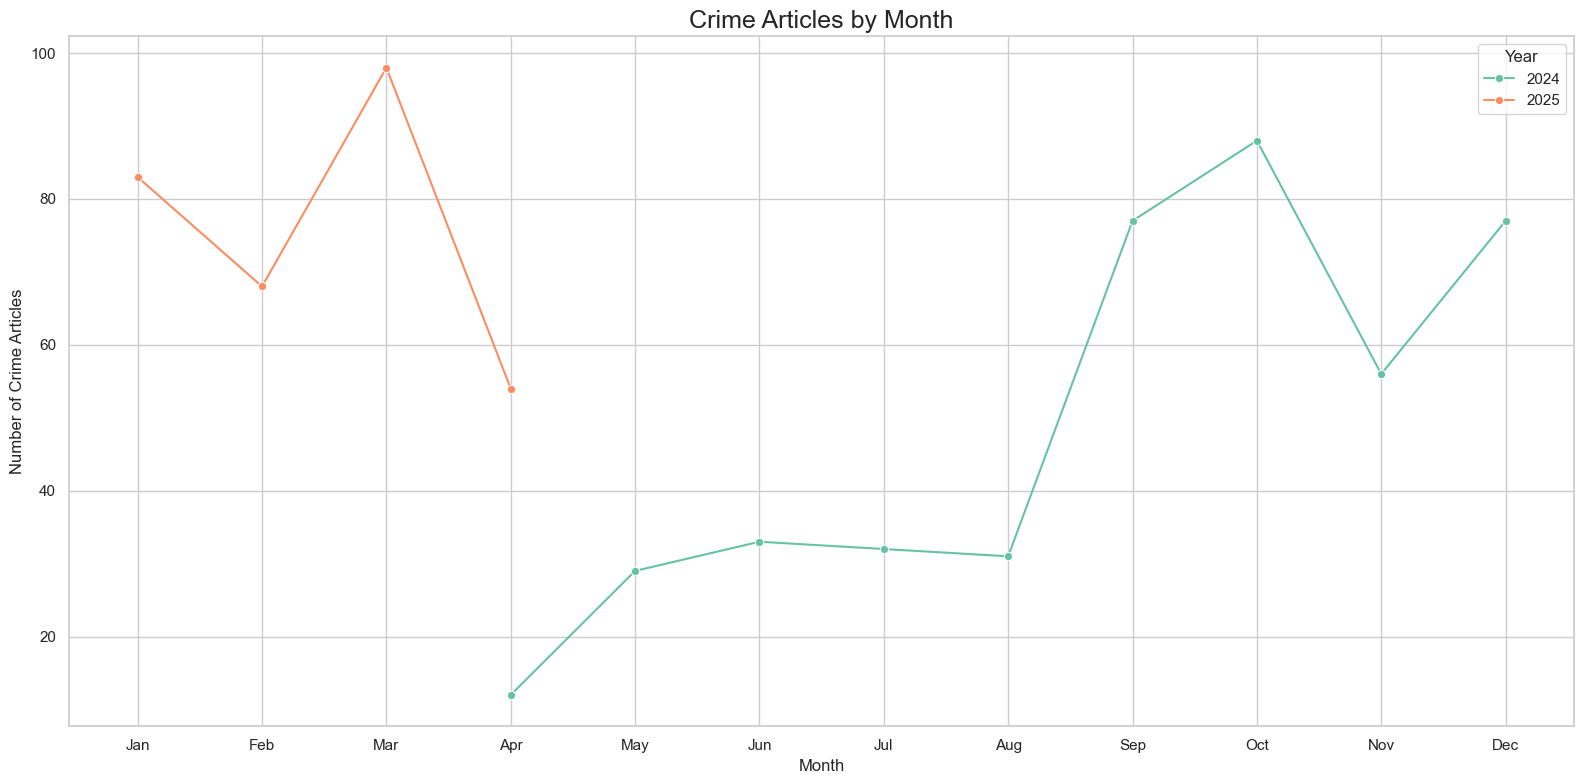

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("final_output.csv")


df['Date'] = pd.to_datetime(df['Date'])


crime_df = df[df['Tags'] == 'Crime']


crime_df['Month'] = crime_df['Date'].dt.month
crime_df['Year'] = crime_df['Date'].dt.year


crime_monthly_count = crime_df.groupby(['Year', 'Month']).size().reset_index(name='Crime Count')


plt.figure(figsize=(16, 8))  
sns.lineplot(data=crime_monthly_count, x='Month', y='Crime Count', hue='Year', marker='o', palette='Set2')
plt.title("Crime Articles by Month", fontsize=18)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Crime Articles", fontsize=12)
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid(True)
plt.tight_layout()  
plt.show()


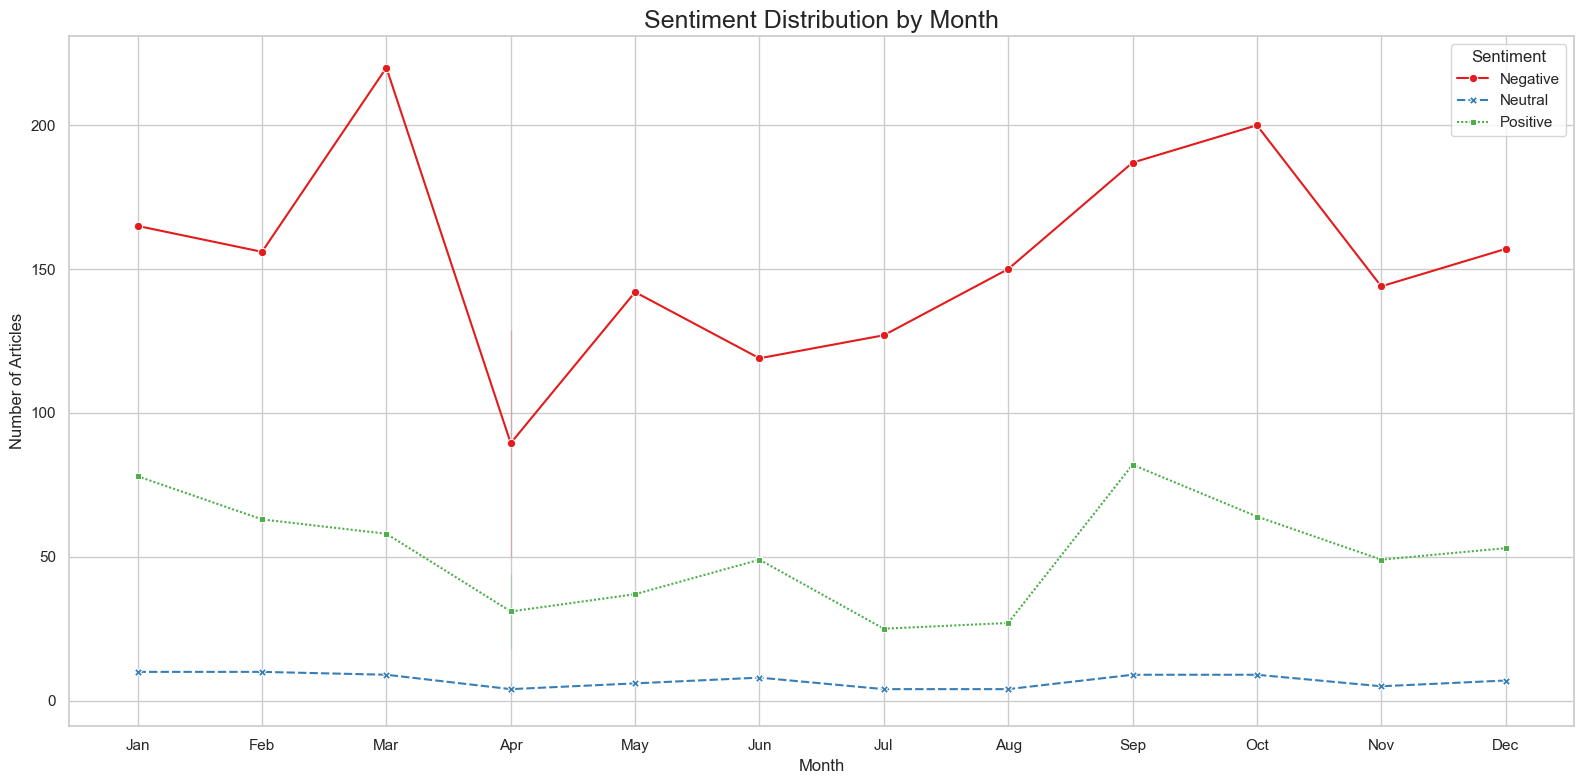

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("final_output.csv")


df['Date'] = pd.to_datetime(df['Date'])


df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year


sentiment_monthly_count = df.groupby(['Year', 'Month', 'Sentiment']).size().reset_index(name='Sentiment Count')


plt.figure(figsize=(16, 8))  
sns.lineplot(data=sentiment_monthly_count, x='Month', y='Sentiment Count', hue='Sentiment', style='Sentiment', markers=True, palette='Set1')
plt.title("Sentiment Distribution by Month", fontsize=18)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Articles", fontsize=12)
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid(True)
plt.tight_layout()  
plt.show()
